In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
# visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

In [2]:
data = pd.read_csv('fuel_ferc1.csv')

## Question 1

In [3]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [4]:
#correct answer because it gives the desired output
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [5]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [6]:
# it works but does not give the desired ouput thats why .append() method is not correct
A.append(B)
A

[1, 2, 3, 4, 5, 6, [13, 21, 34]]

## Question 2

The following will give an Error 
- eye(3)
- np.array([1,0,0],[0,1,0],[0,0,1])
- np.array[(1,0,0),(0,1,0),(0,0,1)]

In [7]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Question 3

In [8]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [9]:
#first group the data by fuel type code
#then print out the mean of fuel cost per unit burned for each type
#sort in ascending order (from smallest to largest)

data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values(ascending = True)

#after doing this we see that gas has the lowest average(maen)

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

## Question 4

In [10]:
#get the description for the fuel_mmbtu_per_unit column
data.fuel_mmbtu_per_unit.describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

## Question 5

In [11]:
data['fuel_qty_burned'].skew()  #skweness

15.851495469109503

In [12]:
data['fuel_qty_burned'].kurtosis()  #kurtosis

651.3694501337732

## Question 6

In [20]:
data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [17]:
(((data.isnull().sum())/ len(data)) * 100).round(3)

record_id                       0.00
utility_id_ferc1                0.00
report_year                     0.00
plant_name_ferc1                0.00
fuel_type_code_pudl             0.00
fuel_unit                       0.61
fuel_qty_burned                 0.00
fuel_mmbtu_per_unit             0.00
fuel_cost_per_unit_burned       0.00
fuel_cost_per_unit_delivered    0.00
fuel_cost_per_mmbtu             0.00
dtype: float64

## Question 7

In [18]:
data.fuel_unit.dtype  #datatype is object so it is a categorical column

dtype('O')

In [19]:
cols = ['fuel_unit']
for col in cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
#it is advisable to fill with the most occuring category(mode)

In [21]:
data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

## Question 8

The closer a correlation value is to zero the less correlated they are, so the second and third least correlated columns are
- fuel_qty_burned
- fuel_mmbtu_per_unit

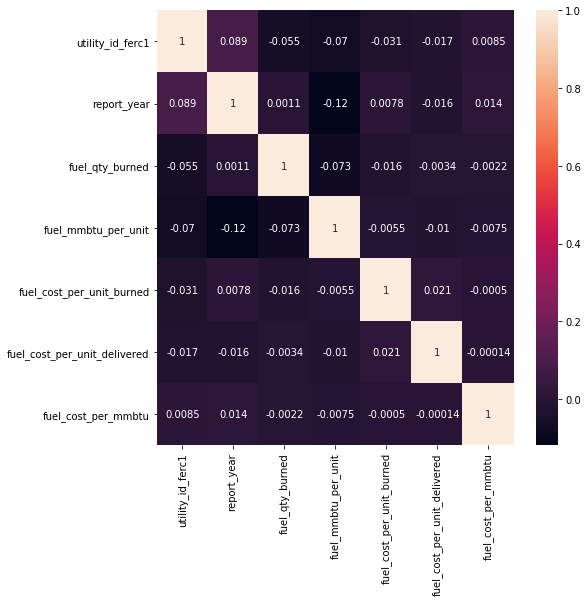

In [28]:
plt.figure(figsize = (8,8))
sample = data.sample(n=15000, random_state=42)
sns.heatmap(sample.corr(), annot = True)

## Question 9

In [29]:
#get the data for only fuel type of coal 
coal = data[data['fuel_type_code_pudl']=='coal']

In [30]:
#fuel cost per unit burned over the years for coal users
#group by the year and show their respective sum of fuel cost per unit burned
coal.groupby('report_year')['fuel_cost_per_unit_burned'].sum()

report_year
1994     14984.572
1995     14571.785
1996     12694.803
1997     43742.178
1998     11902.597
1999     16303.468
2000    100428.831
2001     15109.012
2002      9171.164
2003     30954.110
2004      9632.063
2005     11107.182
2006     12402.684
2007     12965.171
2008     14331.348
2009     45554.858
2010     88627.745
2011     17001.015
2012     17546.097
2013     17629.860
2014     15412.197
2015     13338.235
2016     11100.925
2017     10254.284
2018      9488.197
Name: fuel_cost_per_unit_burned, dtype: float64

In [34]:
#manual computation from the above result
((11902.597 - 14984.572)/14984.572) *100

-20.567654518260518

## Question 10

In [36]:
#since we're looking for the year with the highest average fuel cost per unit delivered,
#group the data by year the print the respective averages of the fuel cost per unit delivered per year
#arramge in descending order(highest to smallest)

data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending = False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64